### Explore Bike Share Data

For this project, the goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What are the most common trip durations in New York?**

In [5]:
library(ggplot2)

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_bin()`)."


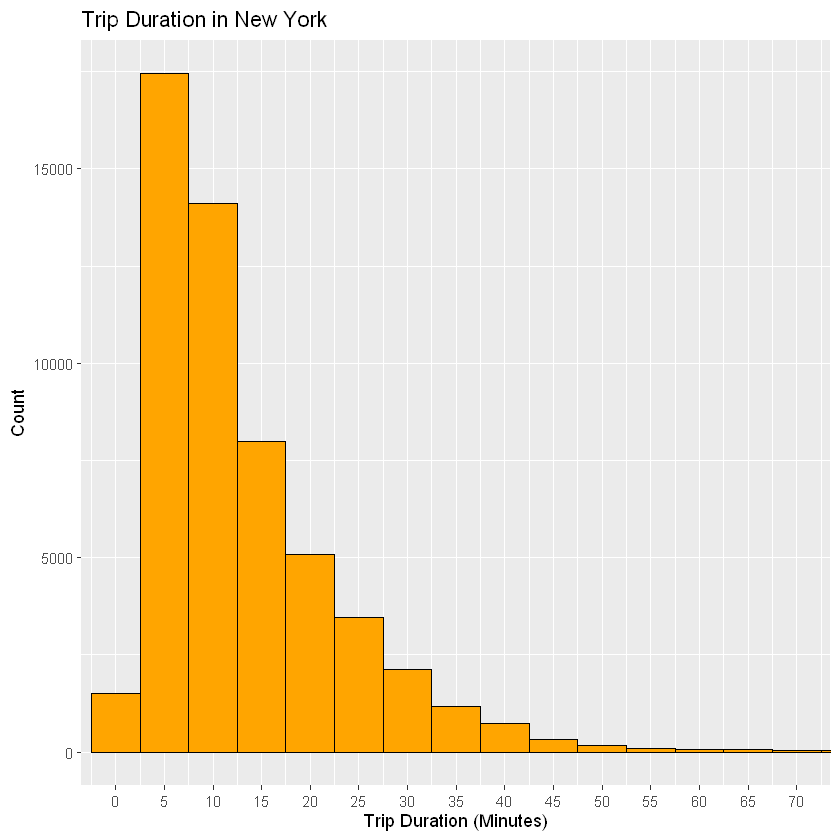

In [6]:
ggplot(data=ny, aes(x=Trip.Duration/60)) +
    geom_histogram(binwidth=5, color=I('black'), fill=I('orange')) + 
    coord_cartesian(xlim = c(0,70)) +
    scale_x_continuous(breaks=seq(0, 70, 5))+
    labs(title="Trip Duration in New York", x = "Trip Duration (Minutes)", y = "Count")

**In New York City, most trips are under 30 minutes. The most common trip durations are from 5 to 10 minutes.**

### Question 2

**Which type of users in New York City have longer average trip durations?**

Warning message in geom_bar(stat = "summary", fun.y = mean, color = I("black"), :
"Ignoring unknown parameters: `fun.y`"
No summary function supplied, defaulting to `mean_se()`


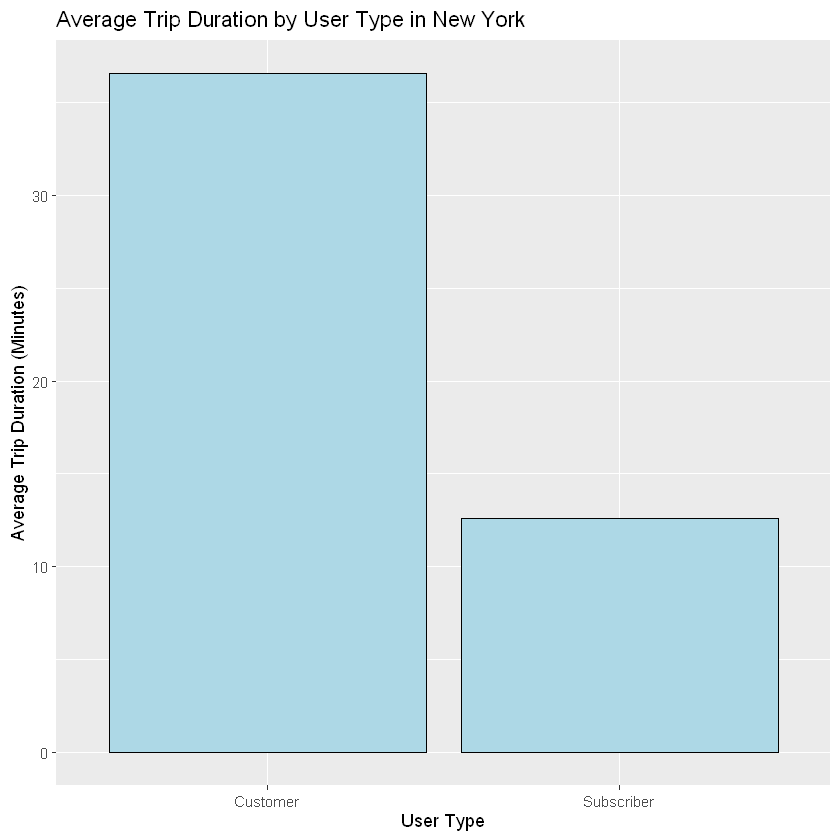

In [7]:
ggplot(data = subset(ny, User.Type != ""), aes(x=User.Type, y = Trip.Duration/60)) +
    geom_bar(stat="summary", fun.y=mean, color=I('black'), fill=I('light blue')) +
    labs(title="Average Trip Duration by User Type in New York ", x = "User Type", y = "Average Trip Duration (Minutes)")

In [8]:
by(ny$Trip.Duration/60, ny$User.Type, mean)

ny$User.Type: 
[1] NA
------------------------------------------------------------ 
ny$User.Type: Customer
[1] 36.55127
------------------------------------------------------------ 
ny$User.Type: Subscriber
[1] 12.58972

**In New York, customers have significantly longer average trip durations than subscribers. On average, customers spend about 37 minutes per trip, while subscribers typically ride for just 13 minutes.**

### Question 3

**What are trip durations for different genders in New York City?**

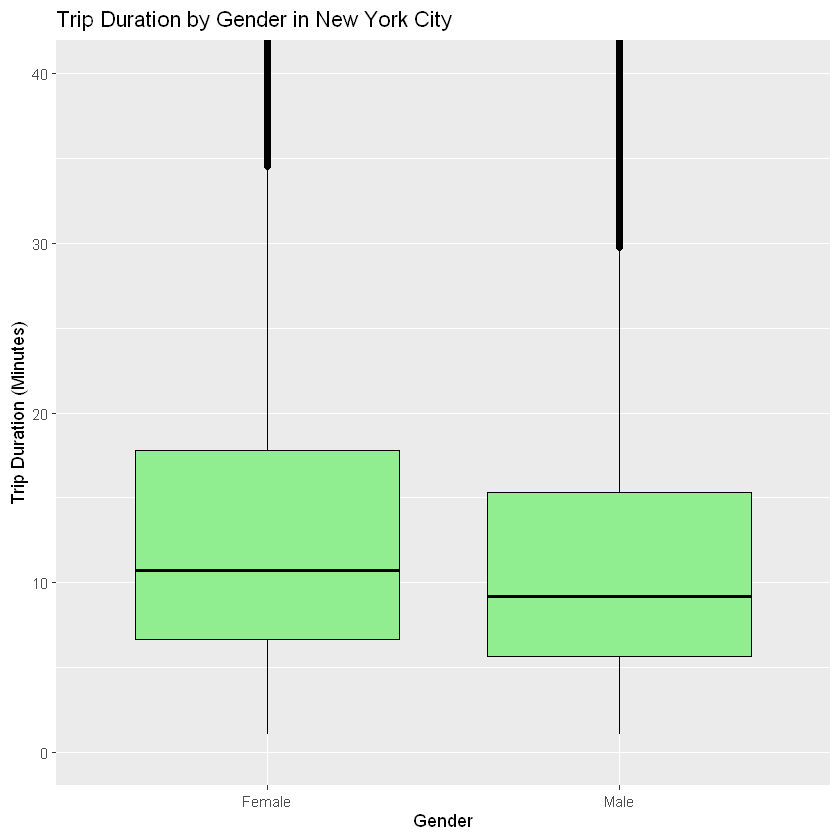

In [9]:
ggplot(data = subset(ny, Gender != ""), aes(x=Gender, y = Trip.Duration/60)) +
    geom_boxplot(color=I('black'), fill=I('light green')) +
    coord_cartesian(ylim=c(0,40))+
    labs(title="Trip Duration by Gender in New York City", x = "Gender", y = "Trip Duration (Minutes)")

In [10]:
by(ny$Trip.Duration/60, ny$Gender, summary)

ny$Gender: 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   1.033   12.300   20.533   31.536   28.483 8256.900        1 
------------------------------------------------------------ 
ny$Gender: Female
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.017    6.667   10.733   14.600   17.800 1298.633 
------------------------------------------------------------ 
ny$Gender: Male
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.017     5.667     9.183    12.815    15.300 18143.900 

**For female riders in New York, the average trip duration is 14.6 minutes, with a median of 10.7 minutes. Male riders, on average, spend 12.8 minutes per trip, with a median of 9.2 minutes. Both genders have a wide range of trip durations, with the longest female trip reaching nearly 22 hours (1,298.6 minutes) and the longest male trip exceeding 300 hours (18,143.9 minutes).**